# FIFA 22 Player Analysis
## by Nwani Ugonna Stanley

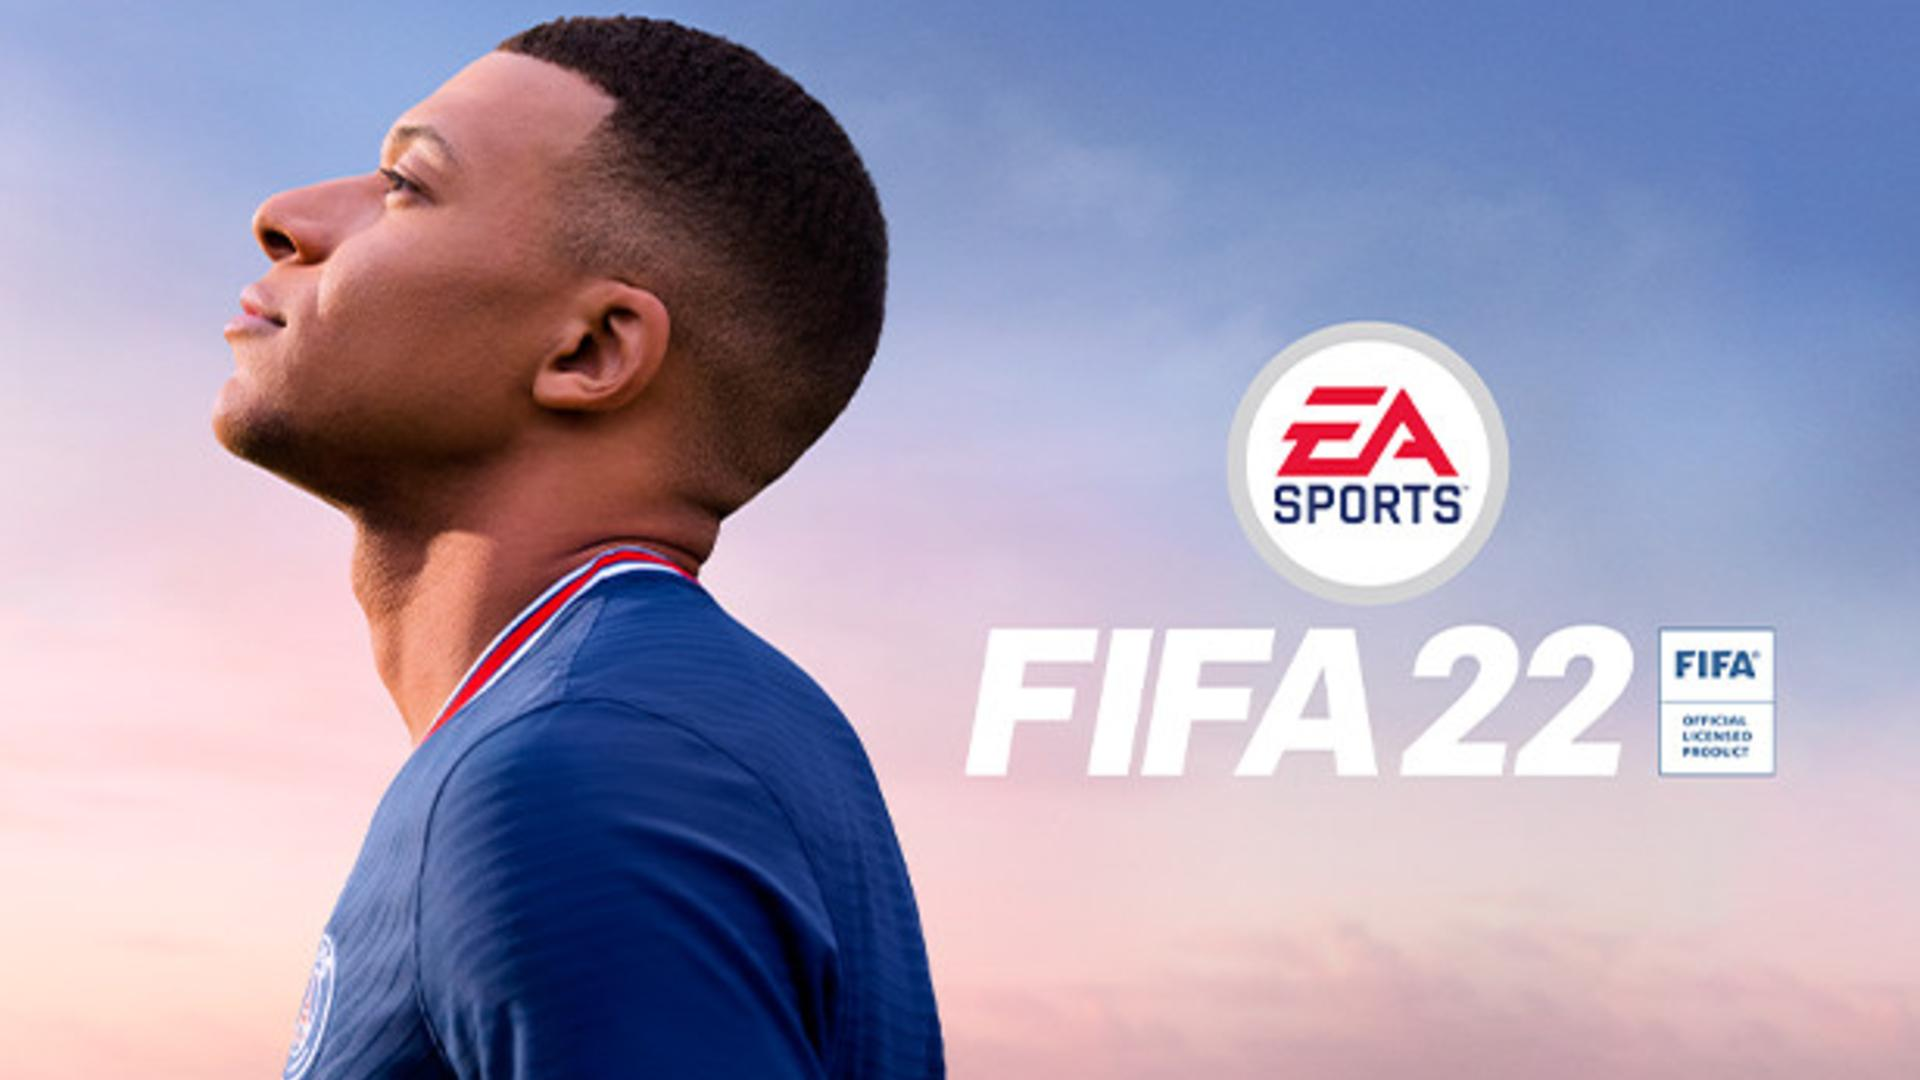

In [1]:
from IPython.display import Image

Image('EA FIFA cover picture.jpg')

## Introduction
This data set used in this project was gotten from [kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv) and includes player data for the FIFA 22 game. The data set contans 19000+ rows and 110 columns. Each column is a different attribute/rating and reach row is a differrent male footballer.

In [45]:
# import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import clear_output

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# set this to be able to view all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read in the data
df = pd.read_csv("players_22.csv")

# view first few rows
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


Since there are so many columns, let's reduce the number of columns to the ones that seem interesting.

In [5]:
# select columns of interest (a lot, lol)

col_interest = ['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 
 'league_name', 'club_position', 'nationality_name', 'preferred_foot', 'release_clause_eur', 'pace', 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
 'goalkeeping_speed',]

In [6]:
# create a new dataframe for columns of interest
df1 = df[col_interest]

# view first few rows
df1.head()

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,RW,Argentina,Left,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,ST,Portugal,Right,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,Manchester City,English Premier League,RCM,Belgium,Right,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN


## Data Exploration

In [7]:
color = sns.color_palette()[9]

Text(0, 0.5, 'frequency')

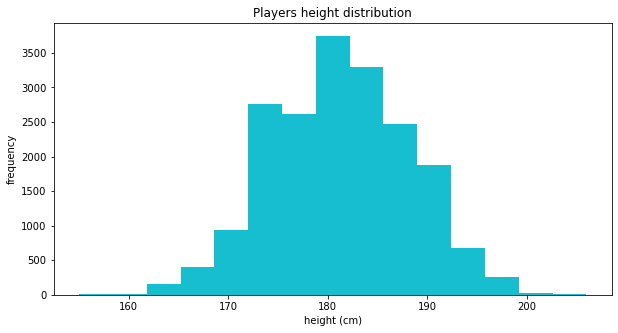

In [8]:
# distribution of height in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['height_cm'], bins=15, color=color);

plt.title('Players height distribution');
plt.xlabel('height (cm)')
plt.ylabel('frequency')

The histogram shows players are mostly around 170cm to 190cm tall. That's around the 6 feet range which is pretty tall.

Text(0, 0.5, 'frequency')

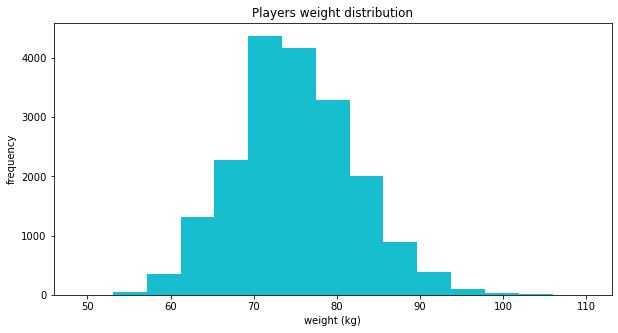

In [9]:
# distribution of weight in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['weight_kg'], bins=15, color=color);

plt.title('Players weight distribution');
plt.xlabel('weight (kg)')
plt.ylabel('frequency')

This histogram shows that players typically weigh between 65kg to 85kg. Compared to the height distribution, this is a good weight in body mass index perspective. I guess this is expected given that players have to exercise, stay on a diet and all that so they'll be fit to play.

Text(0, 0.5, 'frequency')

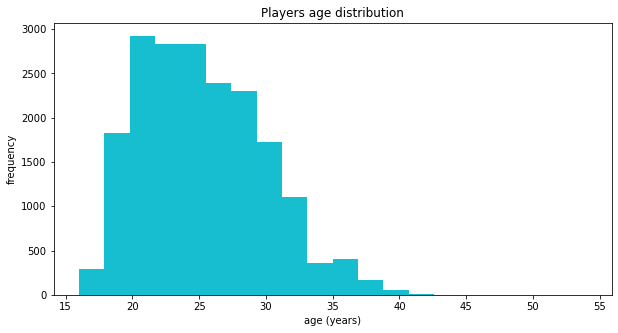

In [10]:
# distribution of age in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['age'], bins=20, color=color);

plt.title('Players age distribution');
plt.xlabel('age (years)')
plt.ylabel('frequency')

The age histogram distribution is skewed to the right, meaning that the players are generally younger. This is not a surprise because players typically start playing football in their teens and retire around 40.

The players are generally between 20 to 30 years old.

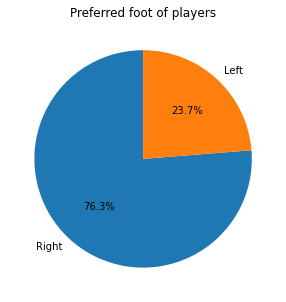

In [11]:
plt.figure(figsize=(10,5))

# convert value to True/False values in order to be visualized by a pie chart 
foot = df1.preferred_foot.value_counts()

# specify labels
labels = ['Right', 'Left']

plt.pie(foot, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title
plt.title('Preferred foot of players')
plt.show() 

This pie chart shows that 76.3% of players' preferred foot is the right foot. This does not mean that they don't use their left foot as well because there are definitely players that can use both feet. 

In [12]:
# create function that easily allows to create count plots 
def top100(col, title, xlabel, ylabel='Number of players'):
    '''
    Create count plots easily from a dataframe.

    Args:
        col: A column in the dataframe.
        title: Title of the plot.
        xlabel: x-axis label.
        ylabel: y-axis label

    Returns:
        Returns a count plot of the selected column.
    '''
    
    plt.figure(figsize=(20,6))

    # create dataframe to be used for the plot
    top100 = df1.iloc[:100, :]

    sns.countplot(x=col, data=top100, color=color);

    # label and title
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(rotation=90);

    #-------------------------------------------------------------------------------------------------------------------------

    # get the current tick locations and labels
    locs, labels = plt.xticks()

    # add annotations
    cat_counts = top100[col].value_counts()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        top100_label = cat_counts[label.get_text()]
        pct_string = '{:0.0f}'.format(top100_label)

        # print the annotation just below the top of the bar
        plt.text(loc, top100_label-0.5, pct_string, ha = 'center', color = 'w', weight='bold');


The huge block of code above is a simple function that creates a countplot from the dataframe. The parameters for the function are the column name to be used to create the count plot, the title, the x-axis label and the y-axis label of the plot. 

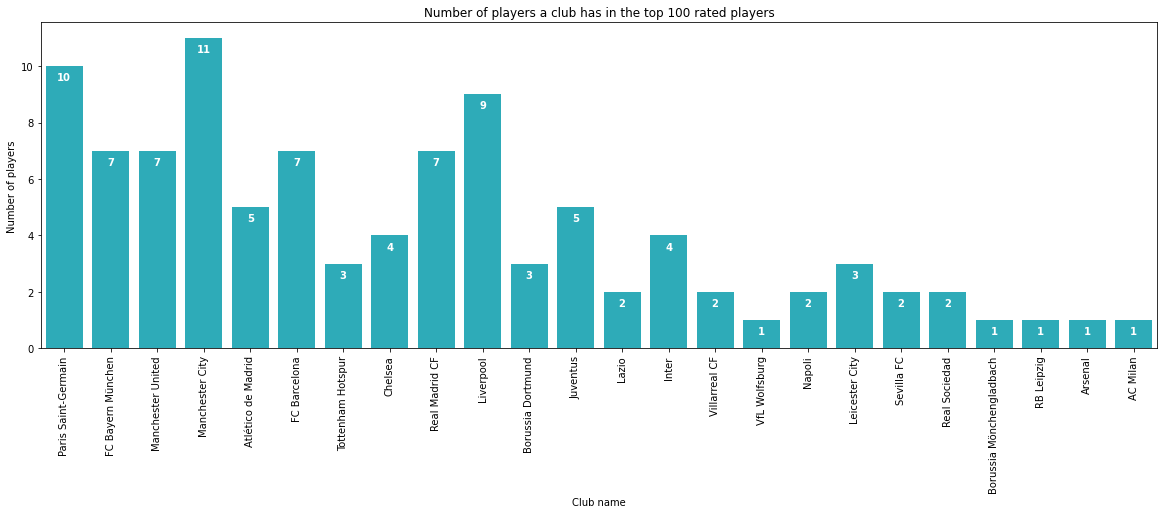

In [13]:
col = 'club_name'
title = 'Number of players a club has in the top 100 rated players'
xlabel = 'Club name'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which clubs contain the most players in the top 100 overall rated players.
> We can see that Manchester City has the most players (11) in the top 100. That should be like their starting XI which is ridiculous.
>
> PSG comes second with 10 players and Liverpool, third wit 9 players.

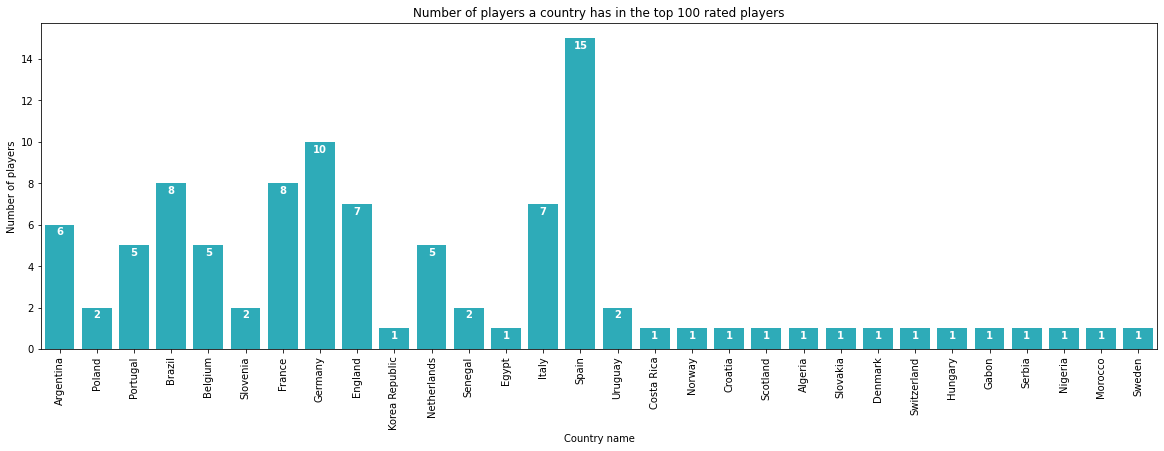

In [14]:
col = 'nationality_name'
title = 'Number of players a country has in the top 100 rated players'
xlabel = 'Country name'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which countries contain the most players in the top 100 overall rated players.
> Spain by far has the most players (15) in the top 100 overall rated. Germany is next with 10 players.

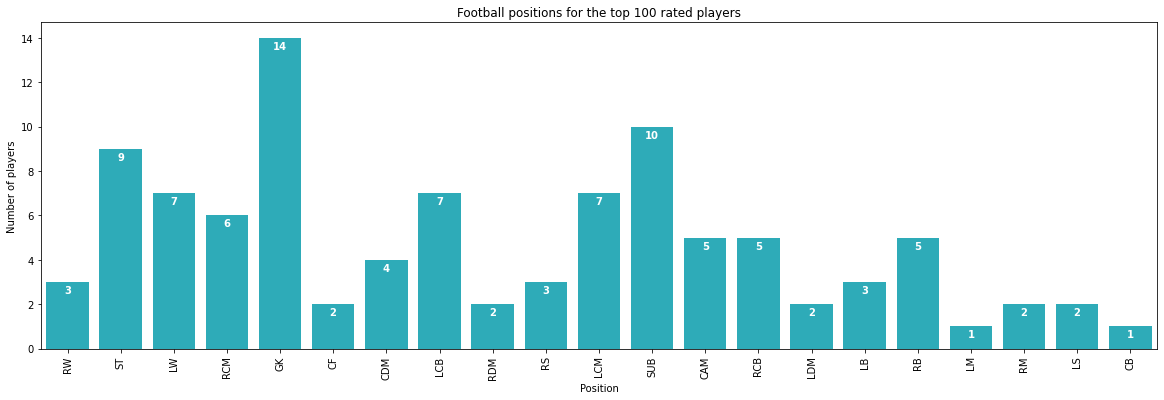

In [15]:
col = 'club_position'
title = 'Football positions for the top 100 rated players'
xlabel = 'Position'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which player positions contain the most players in the top 100 overall rated players.
> Surprisingly, for me at least, Goalkeepers are the most common by far in the top 100 overall rated. There are 14 Goalkeepers in the top 100.
>
> The next most common position is actually players that play as substitutes for their clubs (which is also surprising by the way). 10 players made it to the top 100.
>
> The third most common football position is the Striker spot.

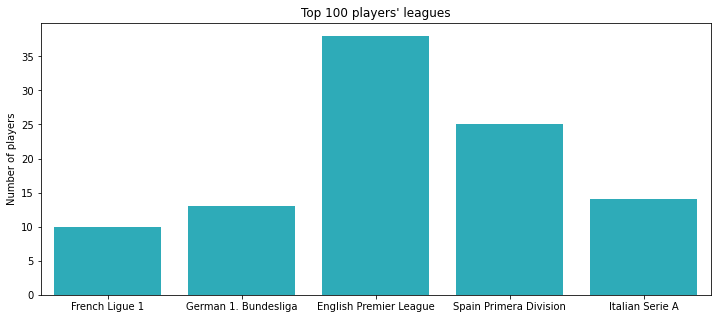

In [16]:
plt.figure(figsize=(12, 5))

# create dataframe to be used for the plot
league100 = df1.iloc[:100, :]

sns.countplot(x='league_name', data=league100, color=color);

# labels and title
plt.title("Top 100 players' leagues");
plt.xlabel('');
plt.ylabel('Number of players');

As we can see in this bar plot, most of the players in the top 100 overall rated play in the English Premier League.

In [17]:
# create function to easily create bar plots
def top10(col, title, xlabel='Player name', ylabel='Rating'):
    '''
    Create bar plots easily from a dataframe.

    Args:
        col: A column in the dataframe.
        title: Title of the plot.
        xlabel: x-axis label. Default is 'Player name'
        ylabel: y-axis label. Default is 'Rating'

    Returns:
        Returns a bar plot of the selected column as the y-axis and the name of the player as the x-axis.
    '''
    
    plt.figure(figsize=(20,6))

    # create dataframe to be used for the plot
    top10 = df1.sort_values(col, ascending=False).head(10)
   
    sns.barplot(x='short_name', y=col, data=top10, color=color)

    # label and title
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

    #-------------------------------------------------------------------------------------------------------------------------

    # get the current tick locations and labels
    locs, labels = plt.xticks()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label and use it to filter the dataframe for the overall value
        top10_label = top10[top10['short_name'] == label.get_text()][col]

        # extract the overall value from the overall_label series and format
        top10_label = top10_label.values[0]
        pct_string = '{:0.0f}'.format(top10_label)

        # print the annotation just below the top of the bar
        plt.text(loc, top10_label-4, pct_string, ha = 'center', color = 'w', weight='bold');

The block of code above is a function that creates a bar plot containing the top 10 players with the highest rating in a partiular skill. The function takes parameters similar to the other function; column name that contains ratings for a skill, title of the plot, x-axis label and y-axis label. The axis labels are both optional as they have default parameters assigned to them.

This function can be used to create plots for all the columns that contains rating for a particular skill (there are a lot of them!). I am only going through a few to demonstrate how it works.

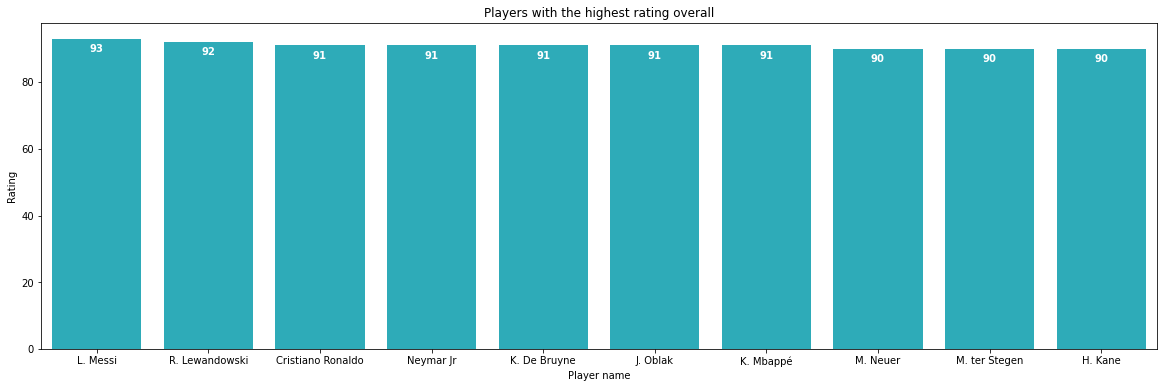

In [18]:
col = 'overall'
title = 'Players with the highest rating overall'

top10(col=col, title=title)

This plot shows the highest rated players in this years FIFA rating. Lionel Messi is top with an overall rating of 93, closely followed by Robert Lewandowski who has an overall rating of 92.

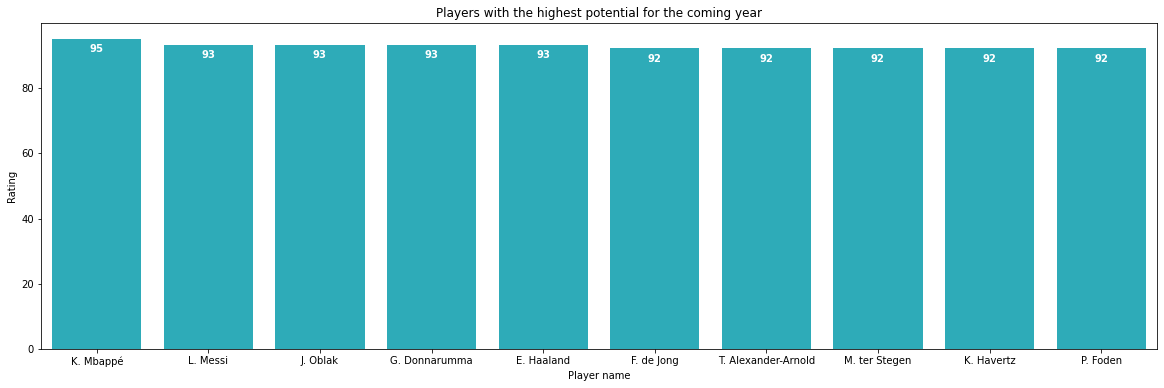

In [19]:
col = 'potential'
title = 'Players with the highest potential for the coming year'

top10(col=col, title=title)

This plot shows players with the highest potential for the coming year. Kylian Mbappe is top with a potential rating of 95, Lionel Messi is second with a rating of 93. 

Looking through this plot, it can be observed that Messi is 10 years older than most of the players here. This makes his high potential rating even more impressive.

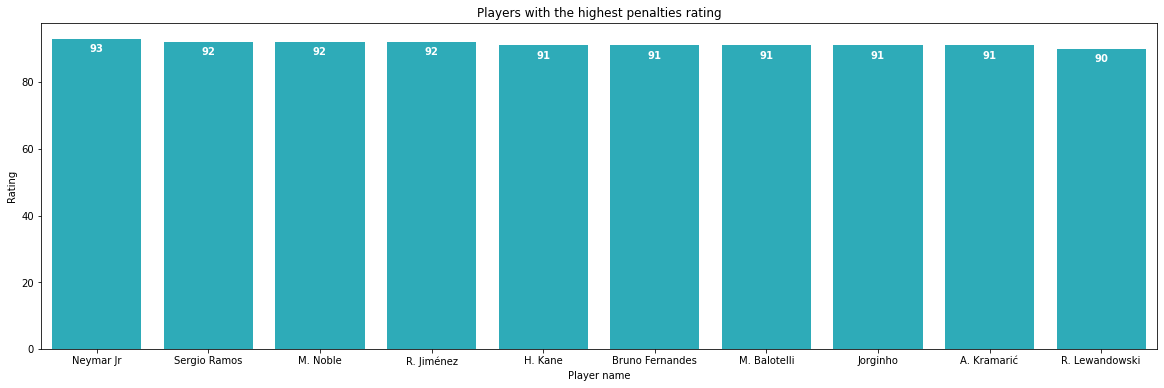

In [20]:
col = 'mentality_penalties'
title = 'Players with the highest penalties rating'

top10(col=col, title=title)

This plot shows players that have the highest penalties rating. Neymar Jr is the player with the highest rating (93). He is closely followed by Sergio Ramos (92), Mark Noble (92) and Raul Jimenez (92).

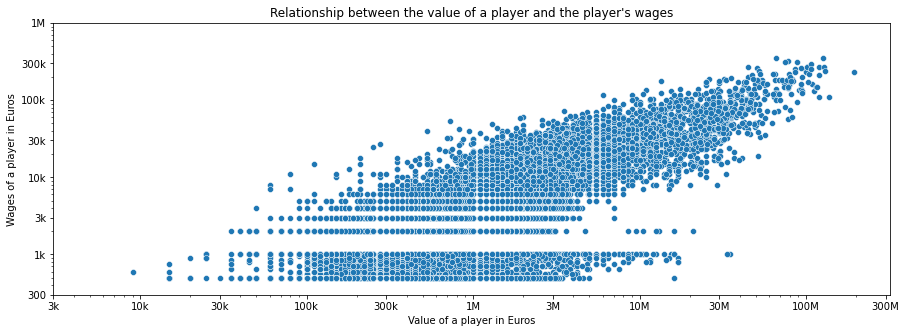

In [21]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='value_eur', y='wage_eur', data=df1);

# plot both axes as a log scale because of the high values.
plt.xscale('log')
plt.yscale('log')
plt.xticks([3e3, 1e4, 3e4, 1e5, 3e5, 1e6, 3e6, 1e7, 3e7, 1e8, 3e8], 
           ['3k', '10k', '30k', '100k', '300k', '1M', '3M', '10M', '30M', '100M', '300M'])
plt.yticks([300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title("Relationship between the value of a player and the player's wages");
plt.xlabel("Value of a player in Euros");
plt.ylabel('Wages of a player in Euros');

This scatter plot shows the positive correlation between the amount in wages a player earns (Euros) and the reported value of a player (Euros).

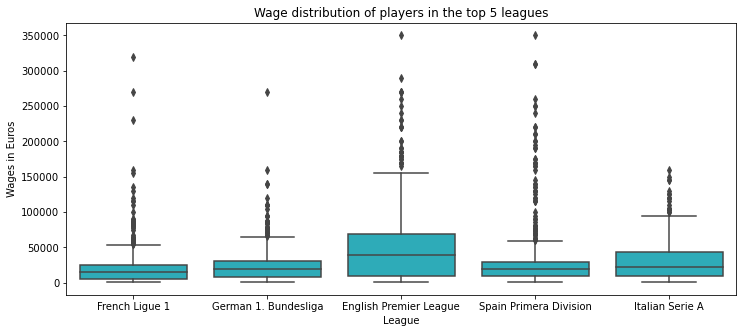

In [22]:
plt.figure(figsize=(12, 5))

# create dataframe to be used for the plot
top5_leagues = ['English Premier League', 'Spain Primera Division', 'French Ligue 1',
                'Italian Serie A', 'German 1. Bundesliga']
top5_leagues_df = df1[df1.league_name.isin(top5_leagues)]

sns.boxplot(x='league_name', y='wage_eur', data=top5_leagues_df, color=color);

# labels and title
plt.title("Wage distribution of players in the top 5 leagues");
plt.xlabel('League');
plt.ylabel('Wages in Euros');

These boxplots shows the wage distribution of players in the top 5 leagues. 
> The English Premier League pays players the highest amount in wages on average. This league also has their players collecting more in wages in general.
>
> The Italian Serie A has the second highest average wage amount, although there are no extreme cases where players collect really high wages as compared to other leagues.

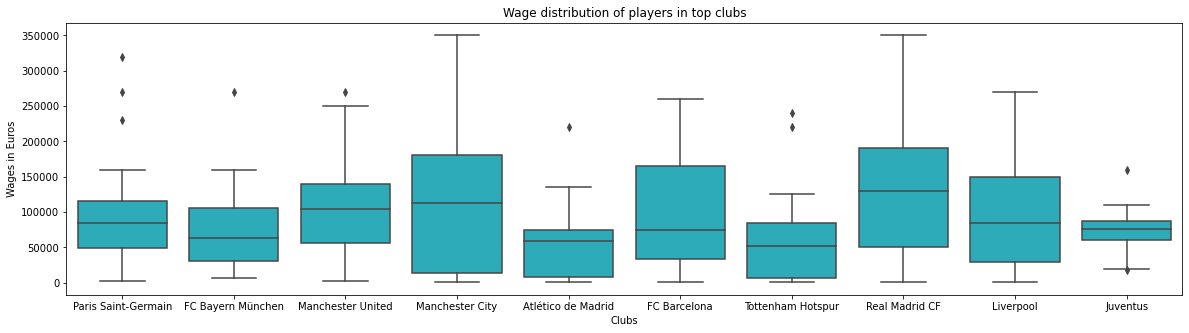

In [23]:
plt.figure(figsize=(20, 5))

# create dataframe to be used for the plot
top_clubs = ['Paris Saint-Germain', 'FC Bayern München', 'Manchester United', 'Manchester City', 'Real Madrid CF',
             'FC Barcelona', 'Liverpool', 'Juventus', 'Tottenham Hotspur', 'Atlético de Madrid']
top_clubs_df = df1[df1.club_name.isin(top_clubs)]

sns.boxplot(x='club_name', y='wage_eur', data=top_clubs_df, color=color);

# labels and title
plt.title("Wage distribution of players in top clubs");
plt.xlabel('Clubs');
plt.ylabel('Wages in Euros');

These boxplots show the wage distribution of players in top clubs.
> Real Madrid on average, pays the highes amount in wages compared to other clubs. They are closely followed by Manchester City.

### Fun facts

* Kevin DeBruyne from Manchester City and Karim Benzema from Real Madrid are the highest earning players. They both earn 350,000 euros in wages.


* Kylian Mbappe from Paris Saint-Germain is the most valued player, valued at 194,000,000 euros. Erling Haaland from Borussia Dortmund is the second most valuable player, valued at 137,500,000 euros.

-------------------------------------------------------------------------------------------------------------------------------

## Machine Learning - KMeans Clustering

In this section, I want to implement KMeans clustering to the dataset to see if it can identify positions that players play. 

KMeans clustering is a machine learning algorithm that looks for patterns in the data. Like I said earlier, I want to see if the KMeans clustering algorithm can detect that there are different positions players play in

For this KMeans model, I want to use the player position ratings as the features to feed into the model. Them I want to see how the model identifies clusters of forwards, midfielders, defenders and goalkeepers.

In [64]:
# select columns of interest and feed into the dataframe
features = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
            'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
df2 = df[features]

In [65]:
# view first few rows
df2.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [66]:
# we need to clean the columns and get rid of the plus signs that are with the ratings
for col in df2.columns:
    df2[col] = df2[col].str.split('+', n=1, expand=True)[0]
    
df2.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,64,64,64,66,61,50,50,50,61,19
1,90,90,90,85,88,88,88,85,86,86,86,84,80,80,80,84,64,66,66,66,64,61,60,60,60,61,19
2,90,90,90,88,89,89,89,88,86,86,86,86,78,78,78,86,63,59,59,59,63,60,53,53,53,60,20
3,83,83,83,90,88,88,88,90,89,89,89,89,82,82,82,89,67,63,63,63,67,62,50,50,50,62,20
4,83,83,83,88,87,87,87,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21


In [67]:
# do the same thing for minus signs that are with the ratings
for col in df2.columns:
    df2[col] = df2[col].str.split('-', n=1, expand=True)[0]
    
df2.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,64,64,64,66,61,50,50,50,61,19
1,90,90,90,85,88,88,88,85,86,86,86,84,80,80,80,84,64,66,66,66,64,61,60,60,60,61,19
2,90,90,90,88,89,89,89,88,86,86,86,86,78,78,78,86,63,59,59,59,63,60,53,53,53,60,20
3,83,83,83,90,88,88,88,90,89,89,89,89,82,82,82,89,67,63,63,63,67,62,50,50,50,62,20
4,83,83,83,88,87,87,87,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21


Now the dataframe is in the right shape. There is no need to scale the data in this case because all the columns in the dataframe are rated between 0 and 100. The dataframe also doesnt contain any null values.

In [68]:
# sanity check for null values
df2.isnull().any().sum()

0

In [69]:
# convert all the columns to integers so that the machine learning model would work effectively
for col in df2.columns:
    df2[col] = df2[col].astype('int')

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ls      19239 non-null  int32
 1   st      19239 non-null  int32
 2   rs      19239 non-null  int32
 3   lw      19239 non-null  int32
 4   lf      19239 non-null  int32
 5   cf      19239 non-null  int32
 6   rf      19239 non-null  int32
 7   rw      19239 non-null  int32
 8   lam     19239 non-null  int32
 9   cam     19239 non-null  int32
 10  ram     19239 non-null  int32
 11  lm      19239 non-null  int32
 12  lcm     19239 non-null  int32
 13  cm      19239 non-null  int32
 14  rcm     19239 non-null  int32
 15  rm      19239 non-null  int32
 16  lwb     19239 non-null  int32
 17  ldm     19239 non-null  int32
 18  cdm     19239 non-null  int32
 19  rdm     19239 non-null  int32
 20  rwb     19239 non-null  int32
 21  lb      19239 non-null  int32
 22  lcb     19239 non-null  int32
 23  cb      192

## KMeans clustering by hand
###  Steps
1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids (not compulsory, but is actually cool to visualize)
6. Repeat 3-5 until the centroids stop changing

In [71]:
df2.describe()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,54.687666,54.687666,54.687666,55.694007,55.562815,55.562815,55.562815,55.694007,55.916420,55.916420,55.916420,56.455377,55.257706,55.257706,55.257706,56.455377,54.188679,53.801237,53.801237,53.801237,54.188679,53.502313,52.504808,52.504808,52.504808,53.502313,21.282811
std,13.602736,13.602736,13.602736,14.668290,14.262141,14.262141,14.262141,14.668290,14.099482,14.099482,14.099482,14.129834,13.322119,13.322119,13.322119,14.129834,13.869097,13.951418,13.951418,13.951418,13.869097,14.082365,14.863148,14.863148,14.863148,14.082365,15.175006
min,16.000000,16.000000,16.000000,14.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,15.000000,14.000000,16.000000,16.000000,16.000000,14.000000,9.000000
25%,49.000000,49.000000,49.000000,50.000000,49.000000,49.000000,49.000000,50.000000,50.000000,50.000000,50.000000,51.000000,50.000000,50.000000,50.000000,51.000000,49.000000,46.000000,46.000000,46.000000,49.000000,47.000000,42.000000,42.000000,42.000000,47.000000,15.000000
50%,57.000000,57.000000,57.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,60.000000,58.000000,58.000000,58.000000,60.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,55.000000,55.000000,55.000000,57.000000,16.000000
75%,64.000000,64.000000,64.000000,66.000000,65.000000,65.000000,65.000000,66.000000,65.000000,65.000000,65.000000,66.000000,64.000000,64.000000,64.000000,66.000000,64.000000,64.000000,64.000000,64.000000,64.000000,63.000000,64.000000,64.000000,64.000000,63.000000,18.000000
max,90.000000,90.000000,90.000000,92.000000,93.000000,93.000000,93.000000,92.000000,93.000000,93.000000,93.000000,91.000000,89.000000,89.000000,89.000000,91.000000,85.000000,87.000000,87.000000,87.000000,85.000000,85.000000,88.000000,88.000000,88.000000,85.000000,89.000000


### 2.
There is no need to scale the data as said previously, so next is to create centroids.

In [72]:
# create a function that automatically creates random centroids
def random_centroids(data, k):
    '''
    Creates random centroids for the given dataframe.

    Args:
        data: dataframe containing columns to create centroids for.
        k: number of centroids to create, this is effectively the number of clusters.

    Returns:
        Returns a dataframe with randomized centroids for each column.
    '''
    centroids = [] # k number of randomized centroids would be stored here
    for _ in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # pick a random row for each column to make up the centroid
        centroids.append(centroid) # append each centroid to the centroids list
    return pd.concat(centroids, axis=1) # concatenate the centroids to create a dataframe with each column as a centroid.

In [73]:
# call the finction to create 4 centroids representing 4 clusters
centroids = random_centroids(df2, 4)

In [74]:
# each column is a centroid, each row is a feature.
centroids

,0,1,2,3
ls,58.0,67.0,47.0,51.0
st,66.0,61.0,37.0,71.0
rs,55.0,66.0,50.0,56.0
lw,73.0,16.0,57.0,50.0
lf,17.0,71.0,21.0,64.0
cf,61.0,60.0,28.0,49.0
rf,54.0,68.0,68.0,67.0
rw,59.0,52.0,74.0,54.0
lam,65.0,69.0,54.0,54.0
cam,61.0,42.0,57.0,61.0


### 3.
Steps 1 and 2 have been done. Next is to get the labels for each data point. This means that we want to get each player position and assign them to the nearest cluster. This is determined by calculating the euclidean distance and assigning a player to the centroid with the smallest distance value.

In [75]:
# create a function to get the cluster labels for each player
def get_labels(data, centroids):
    '''
    Assigns cluster labels to each player by calculating the minimum euclidean distance.

    Args:
        data: dataframe containing features of players.
        centroids: dataframe of randomized centroids.

    Returns:
        Returns a Series with each row (player) assigned to a cluster.
    '''
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) # calculate distances
    return distances.idxmin(axis=1) # select cluster with the minimum euclidean distance.

In [76]:
# store cluster labels in a variable
labels = get_labels(df2, centroids)

labels.head(7)

0    3
1    3
2    3
3    3
4    3
5    1
6    3
dtype: int64

In [77]:
# view how many players assigned to each cluster
labels.value_counts()

3    17114
1     2125
dtype: int64

### 4.
Next step is to create new centroids. This is done by calculating the geometric mean of each cluster and assigning a centroid to that position. 

In [78]:
# this is how it looks like. Each cluster now has a new centroid for the different columns.
df2.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1,24.655716,24.655716,24.655716,22.758244,24.252578,24.252578,24.252578,22.758244,24.903624,24.903624,24.903624,24.106401,25.267355,25.267355,25.267355,24.106401,22.623978,24.637519,24.637519,24.637519,22.623978,22.344048,23.899952,23.899952,23.899952,22.344048,62.378278
3,57.629413,57.629413,57.629413,58.893395,58.555875,58.555875,58.555875,58.893395,58.895553,58.895553,58.895553,59.713123,58.267693,58.267693,58.267693,59.713123,57.355921,56.448970,56.448970,56.448970,57.355921,56.508114,54.724392,54.724392,54.724392,56.508114,15.960513


In [79]:
def new_centroids(data, labels, k):
    '''
    Re-assigns centroids to the center of the clusters. Center is calculated using the geometric mean of points in the cluster.

    Args:
        data: dataframe of players.
        labels: cluster assignments of each player in the dataframe
        k: number of centroids to create, this is effectively the number of clusters.

    Returns:
        Returns a dataframe with centroids for each cluster.
    '''
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T 
    # Used transpose to turn it to the shape of the initail randomized clusters
    return centroids

### 5.
Now we plot the clusters in order to be able to visualize the centroids being formed. We need to transform the data to 2D in order to be able to visualize. This is where PCA (principal component analysis) comes in.

In [80]:
def plot_clusters(data, labels, centroids, iteration):
    '''
    Plot cluster assignments on the dataframe.

    Args:
        data: dataframe of players.
        labels: cluster assignments of each player in the dataframe.
        centroids: geometric mean of the clusters.
        iteration: a counter indicating which iteration is currently running.

    Returns:
        Returns a plot showing clusters and centroid assignments.
    '''
    pca = PCA(n_components=2) # this reduces the dimension (number of features) of the dataframe to 2 for easy visualization.
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True) # this clears the output if there is a graph displayed already.
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

Now we can go ahead and write the body of the KMeans clustering algorithm.

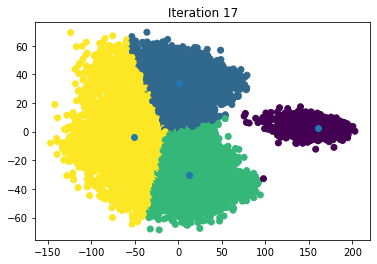

In [91]:
max_iterations = 100
k = 4 # number of centroids, effectively the number of clusters to create

centroids = random_centroids(df2, k)
old_centroids = pd.DataFrame()
iteration = 1

# the loop below keeps running until we have iterated 100 times 
# OR 
# the centroids values stops changing. i.e. old_centroids == centroids
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids # assign centroids to old_centroids
    
    labels = get_labels(df2, centroids) # get cluster labels for the current centroids
    centroids = new_centroids(df2, labels, k) # get new centroids using the cluster labels 
    plot_clusters(df2, labels, centroids, iteration) # plot clusters and centroids
    iteration += 1

Awesome! we can see that there is for sure a cluster that is separate from the pack, I wonder which of the positions represent this cluster. I'd guess that it is the goalkeepers.

In general, the initial randomized cluster assignment can make the model to come up with very different end results. For example, In one iteration, two centroids were placed in the small cluster to the right and in another iteration, only one centroid filled that cluster while the remaining three centroids shared the big cluster.

Maybe 3 centroids is a better choice since it is far less likely for this to occur.

In [92]:
# view the final centroid placements
centroids

,0,1,2,3
ls,24.643652,60.883806,47.464132,63.291902
st,24.643652,60.883806,47.464132,63.291902
rs,24.643652,60.883806,47.464132,63.291902
lw,22.769873,61.604284,47.955112,65.622116
lf,24.264047,61.614343,47.415741,65.217303
cf,24.264047,61.614343,47.415741,65.217303
rf,24.264047,61.614343,47.415741,65.217303
rw,22.769873,61.604284,47.955112,65.622116
lam,24.939612,60.753332,48.199615,66.016962
cam,24.939612,60.753332,48.199615,66.016962


Looking at the centroid placements for each of the features, we can gain some interesting insights.
> Cluster 3 represents forwards and midfielders that are very skilled, that is players with high ratings across forward and midfield playing positions. We know this because the values for these features are generally higher than other clusters
>
> Cluster 0 represents goalkeepers. This is very obvious because it has the lowest values in all other features but the `gk` column where it is significantly higher than other clusters. This basically confirms my suspicion that the small cluster separate from the pack represents goalkeepers.
>
> Cluster 2 has moderately high value for defender positions so it is safe to say this cluster represents defenders.
>
> That leaves Cluster 1, which I would guess represents the average forwards or midfielders.

We can see the results of our clusters by using it to subset the dataframe

In [93]:
# Cluster 3, skilled forwards and midfielders
df1[labels == 3].head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,RW,Argentina,Left,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,ST,Portugal,Right,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,Manchester City,English Premier League,RCM,Belgium,Right,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
6,K. Mbappé,91,95,194000000.0,230000.0,22,182,73,Paris Saint-Germain,French Ligue 1,ST,France,Right,373500000.0,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,NaN
9,H. Kane,90,90,129500000.0,240000.0,27,188,89,Tottenham Hotspur,English Premier League,ST,England,Right,246100000.0,70.0,91.0,83.0,83.0,47.0,83.0,80,94,86,85,88,83,83,65,86,85,65,74,71,92,70,91,79,83,85,86,80,44,94,87,91,91,50,36,38,8,10,11,14,11,NaN
10,N. Kanté,90,90,100000000.0,230000.0,30,168,70,Chelsea,English Premier League,RCM,France,Right,185000000.0,78.0,66.0,75.0,82.0,87.0,83.0,68,65,54,82,56,79,49,49,79,81,82,75,82,93,92,71,77,97,72,65,93,91,72,78,54,84,90,93,86,15,12,10,7,10,NaN
11,K. Benzema,89,89,66000000.0,350000.0,33,185,81,Real Madrid CF,Spain Primera Division,CF,France,Right,135300000.0,76.0,86.0,81.0,87.0,39.0,77.0,75,90,89,86,86,87,81,73,73,90,77,75,79,91,72,85,79,78,82,79,63,39,90,87,84,90,43,24,18,13,11,5,5,7,NaN
13,H. Son,89,89,104000000.0,220000.0,28,183,78,Tottenham Hotspur,English Premier League,LW,Korea Republic,Right,197600000.0,88.0,87.0,82.0,86.0,43.0,69.0,83,88,68,84,78,87,85,74,74,84,85,90,86,91,78,88,60,88,64,89,62,39,91,83,73,89,50,34,33,11,13,13,6,10,NaN


In [94]:
# Cluster 0, goalkeepers
df1[labels == 0].head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
5,J. Oblak,91,93,112000000.0,130000.0,28,188,87,Atlético de Madrid,Spain Primera Division,GK,Slovenia,Right,238000000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0
7,M. Neuer,90,90,13500000.0,86000.0,35,193,93,FC Bayern München,German 1. Bundesliga,GK,Germany,Right,22300000.0,NaN,NaN,NaN,NaN,NaN,NaN,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0
8,M. ter Stegen,90,92,99000000.0,250000.0,29,187,85,FC Barcelona,Spain Primera Division,GK,Germany,Right,210400000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,14,11,61,14,21,18,12,63,30,38,50,39,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,43.0
12,T. Courtois,89,91,85500000.0,250000.0,29,199,96,Real Madrid CF,Spain Primera Division,GK,Belgium,Left,181700000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,62,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,74,86,88,46.0
18,Ederson,89,91,94000000.0,200000.0,27,188,86,Manchester City,English Premier League,GK,Brazil,Left,181000000.0,NaN,NaN,NaN,NaN,NaN,NaN,20,14,14,61,18,23,15,20,66,40,64,63,60,88,48,70,66,41,78,18,38,27,20,70,51,70,29,15,8,87,82,93,88,88,64.0
20,Alisson,89,90,82000000.0,190000.0,28,191,91,Liverpool,English Premier League,GK,Brazil,Right,157900000.0,NaN,NaN,NaN,NaN,NaN,NaN,17,13,29,45,20,27,19,18,44,30,56,47,40,87,37,63,52,32,78,14,27,11,13,66,23,65,15,19,16,86,86,84,90,89,52.0
21,G. Donnarumma,89,93,119500000.0,110000.0,22,196,90,Paris Saint-Germain,French Ligue 1,GK,Italy,Right,230000000.0,NaN,NaN,NaN,NaN,NaN,NaN,12,12,12,36,8,28,12,14,34,30,50,55,64,85,38,59,72,34,72,18,30,26,14,60,24,68,20,14,16,91,83,79,85,90,52.0
26,K. Navas,88,88,15500000.0,130000.0,34,185,80,Paris Saint-Germain,French Ligue 1,SUB,Costa Rica,Right,28700000.0,NaN,NaN,NaN,NaN,NaN,NaN,11,15,11,40,11,24,21,15,37,30,54,53,60,85,61,56,74,39,75,13,32,22,16,68,25,67,28,14,14,89,84,75,87,89,54.0
31,H. Lloris,87,87,13500000.0,125000.0,34,188,82,Tottenham Hotspur,English Premier League,GK,France,Left,25700000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,10,10,50,11,10,11,10,50,34,61,62,55,85,54,49,74,41,43,14,31,27,10,50,40,65,29,10,18,88,83,65,84,90,61.0
34,W. Szczęsny,87,87,42000000.0,105000.0,31,195,90,Juventus,Italian Serie A,GK,Poland,Right,69300000.0,NaN,NaN,NaN,NaN,NaN,NaN,12,12,16,32,14,11,16,14,36,22,51,47,55,82,51,55,71,45,65,14,40,15,14,48,18,65,20,13,12,86,82,73,87,88,49.0


In [95]:
# Cluster 2, defenders
df1[labels == 2].head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
155,K. Manolas,83,83,30000000.0,80000.0,30,189,83,Napoli,Italian Serie A,RCB,Greece,Right,51000000.0,81.0,25.0,44.0,62.0,85.0,81.0,27,25,80,65,16,54,30,10,61,66,77,84,70,81,60,40,91,69,83,12,86,86,25,22,26,83,85,85,87,8,6,8,15,12,NaN
325,W. Orban,81,82,24500000.0,79000.0,28,186,87,RB Leipzig,German 1. Bundesliga,RCB,Hungary,Right,43500000.0,49.0,36.0,52.0,55.0,84.0,80.0,39,38,85,69,31,52,28,32,58,57,50,49,48,75,56,37,91,68,85,29,80,81,42,44,41,72,84,86,80,15,12,15,10,6,NaN
502,Unai Núñez,80,84,27000000.0,26000.0,24,186,81,Athletic Club de Bilbao,Spain Primera Division,SUB,Spain,Right,58700000.0,72.0,22.0,49.0,50.0,81.0,76.0,29,16,81,79,21,35,27,22,50,70,68,75,35,76,60,39,79,67,79,17,78,81,23,30,31,62,78,83,84,9,9,15,6,11,NaN
594,A. Izzo,79,80,16000000.0,47000.0,29,183,81,Torino F.C.,Italian Serie A,RCB,Italy,Right,28400000.0,70.0,33.0,48.0,65.0,82.0,78.0,35,19,81,66,32,63,26,26,60,66,66,74,64,79,66,56,76,78,76,44,81,82,16,33,37,70,82,83,81,12,6,10,11,12,NaN
714,D. Boyata,78,78,11500000.0,42000.0,30,188,84,Hertha BSC,German 1. Bundesliga,RCB,Belgium,Right,19600000.0,70.0,29.0,52.0,58.0,79.0,83.0,46,20,80,72,36,53,34,13,60,60,68,72,64,64,62,55,85,73,88,25,80,77,39,32,13,66,77,81,82,11,8,13,13,8,NaN
759,J. Tah,78,82,17500000.0,43000.0,25,195,98,Bayer 04 Leverkusen,German 1. Bundesliga,LCB,Germany,Right,31100000.0,67.0,27.0,55.0,57.0,79.0,81.0,35,20,79,70,24,52,30,27,63,64,63,71,48,75,38,44,70,64,92,25,77,76,27,56,38,74,80,82,76,11,8,7,9,14,NaN
825,R. Le Normand,78,83,19000000.0,26000.0,24,187,81,Real Sociedad,Spain Primera Division,LCB,France,Right,41300000.0,66.0,25.0,52.0,56.0,80.0,74.0,35,19,83,77,25,52,29,25,62,67,62,70,38,68,53,40,84,60,82,22,68,80,21,31,34,58,82,77,78,9,13,14,15,10,NaN
835,D. Zagadou,78,84,20500000.0,42000.0,22,196,90,Borussia Dortmund,German 1. Bundesliga,SUB,France,Left,39000000.0,59.0,34.0,61.0,52.0,80.0,80.0,46,26,77,75,25,51,37,25,74,52,51,66,39,72,34,66,64,65,92,25,75,77,31,59,30,78,77,86,80,9,13,5,14,14,NaN
880,D. Da Silva,77,77,5000000.0,51000.0,33,184,83,Olympique Lyonnais,French Ligue 1,RCB,France,Right,9500000.0,50.0,37.0,59.0,55.0,78.0,78.0,49,25,80,75,36,42,38,31,74,69,40,58,55,72,59,57,81,73,79,41,81,78,39,40,43,73,79,78,77,6,8,12,16,11,NaN
897,Aridane,77,77,7000000.0,26000.0,32,186,77,CA Osasuna,Spain Primera Division,SUB,Spain,Right,14700000.0,56.0,36.0,54.0,55.0,76.0,84.0,45,26,80,67,40,40,47,46,53,68,50,60,67,72,51,66,87,78,89,31,78,76,35,47,31,66,75,76,77,15,12,9,11,8,NaN


In [96]:
# Cluster 1, average forwards and midfielders
df1[labels == 1].head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
371,Oswaldinato,81,81,25500000.0,56000.0,29,184,79,Flamengo,Campeonato Brasileiro Série A,ST,Brazil,Right,45900000.0,76.0,81.0,67.0,77.0,20.0,78.0,68,85,82,71,72,78,59,49,60,77,77,76,75,82,66,79,81,72,87,76,62,11,85,70,87,78,15,11,18,9,12,7,8,7,NaN
443,J. Martínez,80,80,21500000.0,14000.0,28,170,69,Atlanta United,USA Major League Soccer,LS,Venezuela,Right,32300000.0,87.0,80.0,61.0,79.0,25.0,67.0,53,85,77,69,73,76,68,57,55,79,85,89,90,79,89,84,91,60,69,66,66,20,83,58,79,75,20,20,15,12,14,14,12,8,NaN
518,M. Özil,79,79,14000000.0,55000.0,32,180,71,Fenerbahçe SK,Turkish Süper Lig,RF,Germany,Left,26600000.0,62.0,68.0,85.0,79.0,24.0,48.0,81,67,51,88,77,79,84,75,81,82,66,59,74,77,70,70,40,50,50,64,44,24,80,88,67,83,24,16,19,6,14,10,6,14,NaN
596,A. Saint-Maximin,79,84,26500000.0,41000.0,24,173,67,Newcastle United,English Premier League,LS,France,Right,52300000.0,91.0,69.0,70.0,87.0,25.0,61.0,70,65,53,74,59,91,73,58,64,83,93,90,93,74,87,80,73,74,63,70,36,17,72,71,58,80,28,18,23,10,9,12,7,7,NaN
684,J. Hernández,78,78,9000000.0,12000.0,33,175,73,LA Galaxy,USA Major League Soccer,ST,Mexico,Right,13500000.0,68.0,76.0,63.0,75.0,31.0,66.0,64,81,78,65,72,73,67,52,56,76,72,65,74,84,78,75,83,69,66,66,59,26,87,67,73,79,21,29,25,14,12,9,12,11,NaN
696,A. Budimir,78,78,14000000.0,34000.0,29,190,75,CA Osasuna,Spain Primera Division,SUB,Croatia,Left,29400000.0,65.0,78.0,48.0,73.0,35.0,77.0,41,84,82,68,70,78,44,31,30,79,61,68,56,72,33,78,65,68,83,71,77,24,80,39,65,72,29,35,27,11,14,8,16,15,NaN
697,F. Caputo,78,78,9000000.0,38000.0,33,181,74,U.C. Sampdoria,Italian Serie A,LS,Italy,Right,NaN,82.0,79.0,62.0,78.0,30.0,67.0,50,83,74,70,80,76,58,54,58,78,81,82,85,80,79,76,84,70,70,70,50,14,84,65,78,72,40,20,15,14,7,10,11,11,NaN
747,J. Nsame,78,78,14500000.0,23000.0,28,188,88,BSC Young Boys,Swiss Super League,SUB,Cameroon,Right,21800000.0,79.0,77.0,55.0,73.0,27.0,80.0,39,80,79,68,79,73,56,43,46,75,80,79,72,76,64,79,83,77,87,70,66,18,80,58,74,74,28,19,15,13,12,5,15,5,NaN
754,M. Dembélé,78,82,20500000.0,57000.0,24,183,79,Olympique Lyonnais,French Ligue 1,ST,France,Right,40500000.0,78.0,77.0,63.0,73.0,30.0,82.0,50,80,81,72,72,73,69,58,48,74,75,81,74,78,66,82,86,79,85,66,75,22,82,69,76,76,39,14,16,7,13,11,10,8,NaN
768,L. Alario,78,78,14500000.0,56000.0,28,184,78,Bayer 04 Leverkusen,German 1. Bundesliga,SUB,Argentina,Right,24700000.0,63.0,78.0,58.0,74.0,30.0,75.0,48,83,85,69,80,73,49,43,47,78,66,60,68,77,71,79,87,68,78,63,72,22,84,65,77,76,22,27,20,8,15,7,15,15,NaN


Viewing the dataframes of the clusters confirms our theory!

-------------------------------------------------------------------------------------------------------------------------------

## KMeans clustering using scikit-learn

Instead of computing all those calculations and writing all that code, the `scikit-learn` library makes the process far easier.

In [97]:
# create the KMeans object and set the number of clusters to 4
kmeans = KMeans(n_clusters=4)

In [98]:
# fit the model with our data
kmeans.fit(df2)

KMeans(n_clusters=4)

In [101]:
# place the centroids from the KMeans library into a variable
centroids = kmeans.cluster_centers_

In [102]:
pd.DataFrame(centroids, columns=features).T

,0,1,2,3
ls,63.900814,48.156878,24.998594,61.487160
st,63.900814,48.156878,24.998594,61.487160
rs,63.900814,48.156878,24.998594,61.487160
lw,66.236810,48.888910,23.234880,62.211669
lf,65.847905,48.296754,24.706517,62.208270
cf,65.847905,48.296754,24.706517,62.208270
rf,65.847905,48.296754,24.706517,62.208270
rw,66.236810,48.888910,23.234880,62.211669
lam,66.640187,49.133114,25.434130,61.389917
cam,66.640187,49.133114,25.434130,61.389917


Comparing the two centroids, it is observed that although the centroids for both methods are not the same, both methods are essentially telling the same story. For example, in the case of scikit learn, Cluster 2 represents goalkeepers and  Cluster 0 represented goalkeepers when we calculated it by hand.

If both methods had the same initialized random centroids, we would have gotten similar clusters and final centroids.

-------------------------------------------------------------------------------------------------------------------------------